# <span style="color: #4CAF50; font-family: 'Arial, sans-serif';">INDIA START-UP FUNDING ANALYSIS (2018 to 2021) - </span>


# INTRODUCTION
 The focus of this analysis is on the startup environment in India. This means examining various aspects of startups, including their growth, funding, and other trends. This analysis will cover a period of four years, from 2018 to 2021, which allows for a comprehensive exploration of trends and changes within the startup ecosystem.  The analysis will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework consisting of six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. 

# Business Understanding:
1. Identify Key Trends:  
Objective: Uncover and understand the key trends in the Indian startup ecosystem over the four-year period (2018-2021).  
Goals: Identify sectors experiencing the most significant growth, the distribution of funding across rounds, and the geographic distribution of startup activities.
2. Evaluate Funding Patterns:  
Objective: Analyze funding patterns to understand how different sectors, rounds, and company activities attract investment.  
Goals: Identify sectors receiving the highest and lowest funding, explore the distribution of funding amounts, and understand the most common types of company activities that attract investment.
3. Assess Investor Involvement:  
Objective: Understand the role and impact of investors in the Indian startup ecosystem.  
Goals: Identify the most active investors, assess their investment patterns, and understand the correlation between investor involvement and 
startup success.

# Project Goals:
1. Clean and Prepare Data:  
Objective: Ensure the dataset is cleaned and prepared for analysis.  
Goals: Handle missing values, standardize data types, and address any inconsistencies or outliers.  
2. Perform Exploratory Data Analysis (EDA)  
Objective: Gain insights through exploratory analysis.  
Goals: Visualize trends over time, explore distributions of funding amounts, and identify notable patterns in the data.  
3. Communicate Findings:  
Objective: Effectively communicate insights and findings.  
Goals: Create clear and concise visualizations, reports, and presentations to convey key findings to stakeholders.
4. Provide Recommendations:  
Objective: Offer actionable recommendations based on the analysis.  
Goals: Suggest strategies for startups, investors, and policymakers based on identified trends and opportunities.

# HYPOTHESIS TESTING 
1. Null Hypothesis (HO) - The amount of funding for companies is not influenced by the company's industry.
2. Alternate Hypothesis (H1) - The amount of funding for companies is influenced by the company's industry.

# Business Questions
1. How does the distribution of funding amounts vary across different industries?
2. Are certain industries more consistent in funding amounts, indicating stability or predictability?
3. Can we identify specific industries that tend to attract higher funding amounts?
4. Are there outliers in the funding amounts within certain industries?
5. Does the location influence the funding in certain industries

--

# Indian Startup Analysis Journey

#### Importing Necessary Libraries

In [324]:
# Importing the necessary libraries
import pyodbc     
#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values    
import pandas as pd
from pandas_summary import DataFrameSummary
import warnings 
import re
import numpy as np
warnings.filterwarnings('ignore')
import squarify
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

#### Loading the environment 

The 2021 and 2020 datasets could only be loaded from an online database. Below is the environment to load the dataframes

In [325]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
# server = environment_variables.get("server")
# database = environment_variables.get("database")
# username = environment_variables.get("username")
# password = environment_variables.get("password")

In [326]:
# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [327]:
# Use the connect method of the pyodbc library and pass in the connection string.
# connection = pyodbc.connect(connection_string)

In [328]:
# importing the data sets to the environment. The first two are SQL queries to pull the 2020 & 2021 data from the server
# The data3 & 4 are downloaded data sets thus importing them using pandas read_csv() for the 2018 & 2019 data sets
# query1 = "SELECT * FROM dbo.LP1_startup_funding2021"
# data1 = pd.read_sql(query1, connection)
# query2 = "SELECT * FROM dbo.LP1_startup_funding2020"
# data2 = pd.read_sql(query2, connection)

### Data Frames Importation:  
The 2021 and 2020 dataframes were converted into excel files.  
The four files were all cleaned in Excel and the loaded for analysis


In [329]:
df_2018 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding18.xlsx")
df_2019 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding19.xlsx")
df_2020 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding20.xlsx")
df_2021 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding21.xlsx")

### Checking Data sets loaded on to notebook

In [330]:
# Checking 2018 dataframe
df_2018.head(2)

,Company Name,Industry,Round/Series,Amount,city,About Company
0,Ola,Apps,Unspecified,50000000.0,Kormangala,Ola is a mobile app that brings together cab d...
1,Walmart India,Retail,Unspecified,37680000.0,Gurgaon,Wal-Mart India Private Limited is a wholly own...


In [331]:
# Checking 2019 dataframe
df_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($,Stage
0,Appnomic,NaN,Bengaluru,Saas,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,22000000,Unspecisfied
1,Asteria Aerospace,2011.0,Bengaluru,Robotics & Ai,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000,Unspecisfied


In [332]:
# Checking 2020 dataframe
df_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,1Mg,2015.0,Gurugram,Healthtech,Online pharmacy,"Prashant Tandon, Gaurav Agarwal, Vikas Chauhan",Bill & Melinda Gates Foundation,9900000,unspecified
1,3One4 Capital,2016.0,Bangalore,Venture capital,Use transformative capital and a deep involvem...,"Pranav Pai, Siddarth Pai",NaN,100000000,unspecified


In [333]:
# Checking 2021 dataframe
df_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,1Bridge,2016.0,Bengaluru,Consumer Goods,Village Commerce Network - Bridging Aspiration...,"Madan Padaki, Anil Kumar, M Chakrawarty",C4D Partners,2500000,unspecified
1,1K Kirana Bazaar,2018.0,Gurugram,Retail,India's First and Largest Network of Small-Tow...,"Abhishek Halder, Anilesh Yadav, Kumar Sangeetesh","Info Edge, FalconEdge",7000000,unspecified


#### Cleaning the 2018 dataframe
The cleaning process will follow the following procedure  
1. Checking the data-frame info
2. Checking for duplicates
3. Renaming the columns to future data concat with the other dataframes
4. cleaning the columns for any irregular data types and outliers

In [334]:
# Checking the 2018 data-frame info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   377 non-null    object 
 1   Industry       357 non-null    object 
 2   Round/Series   377 non-null    object 
 3   Amount         377 non-null    float64
 4   city           377 non-null    object 
 5   About Company  377 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.8+ KB


Observation: Based on the info provided in the df_2018 DataFrame:  
1. There are 377 entries in the dataset, indicating information about 377 companies.
2. The 'Industry' column has 357 non-null entries, suggesting that there are 20 missing values in this column.
3. The 'Round/Series' column has 376 non-null entries, meaning there is one missing value in this column.
4. The 'Amount' column contains financial data of funding amounts and is of float64 data type.
5. The 'Company Name', 'Industry', 'Round/Series', 'city', and 'About Company' columns are of object data type, indicating text or categorical data.
6. The 'city' column represents the city where each company is located.
7. The 'About Company' column contains descriptions or information about each company.


#### Cleaning the column names

In [335]:
# Renaming the columns and puting them in lowercase
new_column_names = {'Company Name': 'company_name', 'Industry': 'industry', 'Round/Series' : 'series',
                    'Amount': 'amount', 'city': 'location', 'About Company': 'about'}
df_2018 = df_2018.rename(columns=new_column_names)

#### Checking for duplicates

In [336]:
# Checking for duplicates in the 2018 data
duplicates = df_2018[df_2018.duplicated()]

if duplicates.empty:
    print("Do nothing, there are 0 duplicates.")
else:
    # Remove duplicates
    df_2018_cleaned = df_2018.drop_duplicates()
    print("Cleaned the DataFrame by removing duplicates.")

Do nothing, there are 0 duplicates.


#### Cleaning 2018 data column by column

In [337]:
# Cleaning company_name column
print(f"Number of unique companies in the 2018 dataframe is : {df_2018['company_name'].nunique()}")

Number of unique companies in the 2018 dataframe is : 377


##### Observation:
1.The company name column appears to be clean as is as there are no duplicated company names with 377 unique companies

In [338]:
# Checking the Industry column
print(f"Number of unique industries in 'industry' column: {df_2018['industry'].nunique()}")

Number of unique industries in 'industry' column: 122


In [339]:
df_2018['industry'].value_counts()

industry
Financial Services    22
E-Commerce            18
Health Care           18
Finance               16
Automotive            15
                      ..
Farming                1
Classifieds            1
Audio                  1
Online Portals         1
Digital Marketing      1
Name: count, Length: 122, dtype: int64

Observation:  
The industry column appears to have multiple industries with financial services with the highest frequency(22). This shall be left as is to be cleaned in the merged dataframe

In [340]:
# To clean the series column 
# First checking for unique values
print(f"Unique values in the 'series' column is {df_2018['series'].nunique()}")

Unique values in the 'series' column is 20


Observation:  
The series column has 20 unique values. this will be left as is

In [341]:
# To clean the amount column
# First check the unique entries
df_2018['amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 377 entries, 0 to 376
Series name: amount
Non-Null Count  Dtype  
--------------  -----  
377 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


Observation:  
1. There are 377 non-null entries in the amount column, indicating that there are no missing values.
2. The data type is float64, which is a numeric data type thus clean

In [342]:
# Cleaning the location column
# Checking for unique values
df_2018['location'].unique()

array(['Kormangala', 'Gurgaon', 'Guindy', 'Jaipur', 'Chennai',
       'Bengaluru', 'Mumbai', 'Indore', 'Hyderabad', 'Haryana',
       'Kalpakkam', 'Delhi', 'Noida', 'Alleppey', 'Faridabad', 'Pune',
       'Kolkata', 'Ahmedabad', 'Margão', 'Andheri', 'Bhopal', 'Belgaum',
       'Mylapore', 'Kanpur', 'Thane', 'Coimbatore', 'Kalkaji', 'Guntur',
       'Jodhpur', 'Ghaziabad', 'Kannur', 'Kota'], dtype=object)

Observation:  
The 'location' column in the df_2018 DataFrame includes entries representing various cities and regions in India. Each entry is the City the company is domiciled at.


In [343]:
# clean the about
# Check for unique values
print(f"Unique values in the 'about' column is: {df_2018['about'].nunique()}")

Unique values in the 'about' column is: 376


Observation:  
The about column will be left as is since the values are 376 unique values all object formats

In [344]:
# Checking data info for final cleaning
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  377 non-null    object 
 1   industry      357 non-null    object 
 2   series        377 non-null    object 
 3   amount        377 non-null    float64
 4   location      377 non-null    object 
 5   about         377 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.8+ KB


#### Adding data year column to 2018 
This column will act as the year column which the data was collected

In [345]:
# adding the data year column for 2018
df_2018['data_year'] = pd.to_datetime('2018', format='%Y')

In [346]:
# Cleaning object columns to capitalize the entries
# function to format text with initial uppercase and the rest lowercase
def format_text(entry):
    if isinstance(entry, str):  # Check if the entry is a string
        return entry.capitalize()
    else:
        return entry
# Apply the formatting function to each column with object data
columns_to_format = ['company_name', 'industry', 'series', 'about', 'location',]
for column in columns_to_format:
    df_2018[column] = df_2018[column].apply(format_text)

#### Displaying clean 2018 dataframe

In [347]:
# displaying clean 2018 datframe
df_2018.head(5)

,company_name,industry,series,amount,location,about,data_year
0,Ola,Apps,Unspecified,50000000.0,Kormangala,Ola is a mobile app that brings together cab d...,2018-01-01
1,Walmart india,Retail,Unspecified,37680000.0,Gurgaon,Wal-mart india private limited is a wholly own...,2018-01-01
2,Veritas finance,Financial services,Unspecified,30000000.0,Guindy,Veritas finance has been promoted with a prima...,2018-01-01
3,Rays power infra,Energy,Unspecified,29220000.0,Jaipur,Rays power infra is a leading integrated solar...,2018-01-01
4,Vivriti capital,Financial services,Unspecified,28500000.0,Chennai,Vivriti capital is an online platform for inst...,2018-01-01


## Performing EDA on clean 2018 dataframe

In [348]:
# 1. Summary Statistics
summary_stats = df_2018.describe(include="all")
summary_stats

,company_name,industry,series,amount,location,about,data_year
count,377,357,377,3.770000e+02,377,377,377
unique,377,122,20,NaN,32,376,NaN
top,Ola,Financial services,Seed,NaN,Bengaluru,Algorithmic trading platform.,NaN
freq,1,22,174,NaN,158,2,NaN
mean,NaN,NaN,NaN,1.761903e+07,NaN,NaN,2018-01-01 00:00:00
min,NaN,NaN,NaN,8.766000e+02,NaN,NaN,2018-01-01 00:00:00
25%,NaN,NaN,NaN,5.000000e+05,NaN,NaN,2018-01-01 00:00:00
50%,NaN,NaN,NaN,1.300000e+06,NaN,NaN,2018-01-01 00:00:00
75%,NaN,NaN,NaN,5.000000e+06,NaN,NaN,2018-01-01 00:00:00
max,NaN,NaN,NaN,1.000000e+09,NaN,NaN,2018-01-01 00:00:00


Observations:
1. company_name:
All entries in the company_name column are unique, indicating no repetition.The top entry is "TheCollegeFever."
2. industry: The industry column has 122 occurrences with the top industry being "Financial Services," appearing 22 times.
3. series: The most frequent funding series is "Seed," occurring 174 times. There are 20 unique funding series in the dataset.
4. amount: There are 377 non-null entries in the amount column.The mean funding amount is approximately 17,616,770, while the standard deviation is 77,972,610.
5. about: There are 377 unique entries in the about column.The most frequent description is "Algorithmic trading platform," appearing twice.
6. location: There are 158 occurrences of "Bengaluru" in the location column, making it the most frequent city. There are 32 unique cities in the dataset.


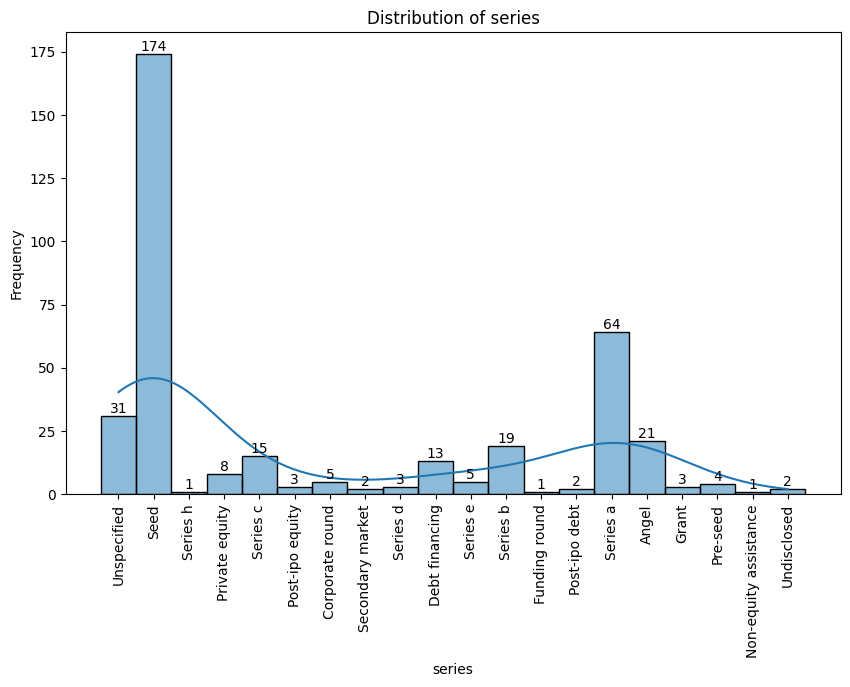

In [349]:
# 2. Distribution of series (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_2018['series'], bins=10, kde=True)
# Add data labels
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribution of series')
plt.xlabel('series')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

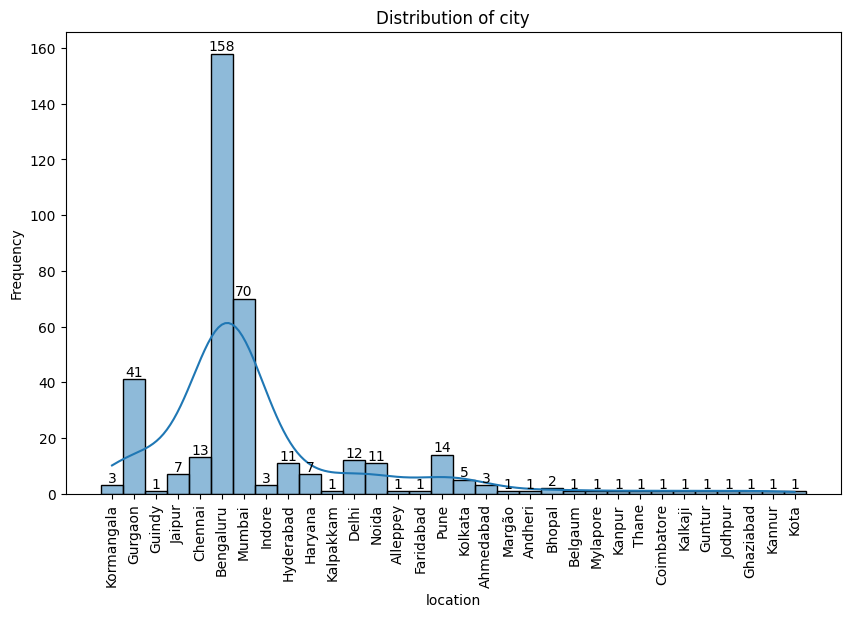

In [350]:
# 2. Distribution of city (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_2018['location'], bins=10, kde=True)
# Add data labels
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribution of city')
plt.xlabel('location')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

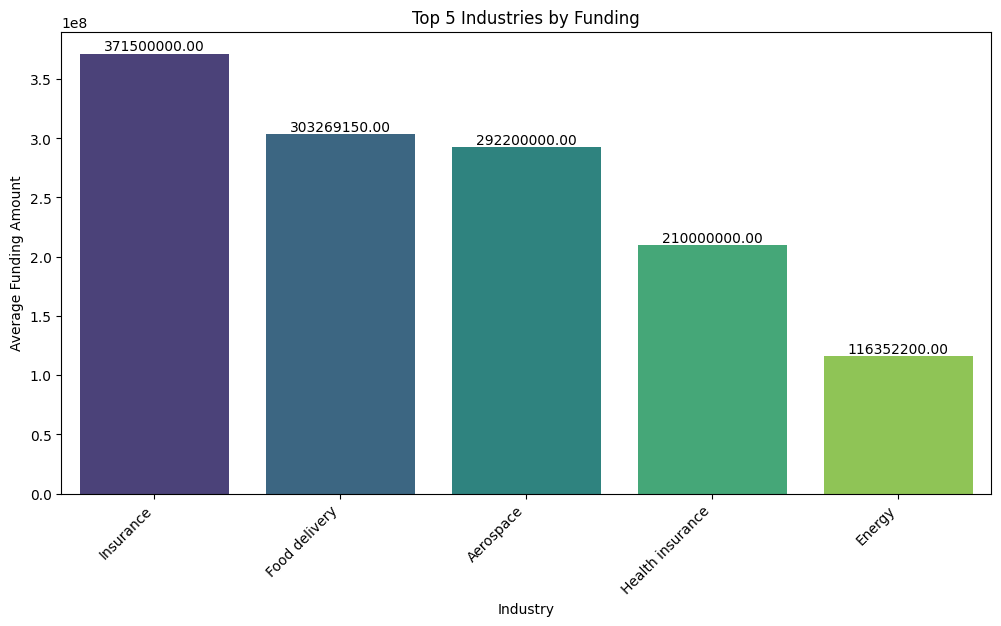

In [351]:
# Top 5 industries
top_industries = df_2018.groupby('industry')['amount'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_industries.index, y=top_industries.values, palette="viridis")
# Adding data labels
for index, value in enumerate(top_industries):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.title('Top 5 Industries by Funding')
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

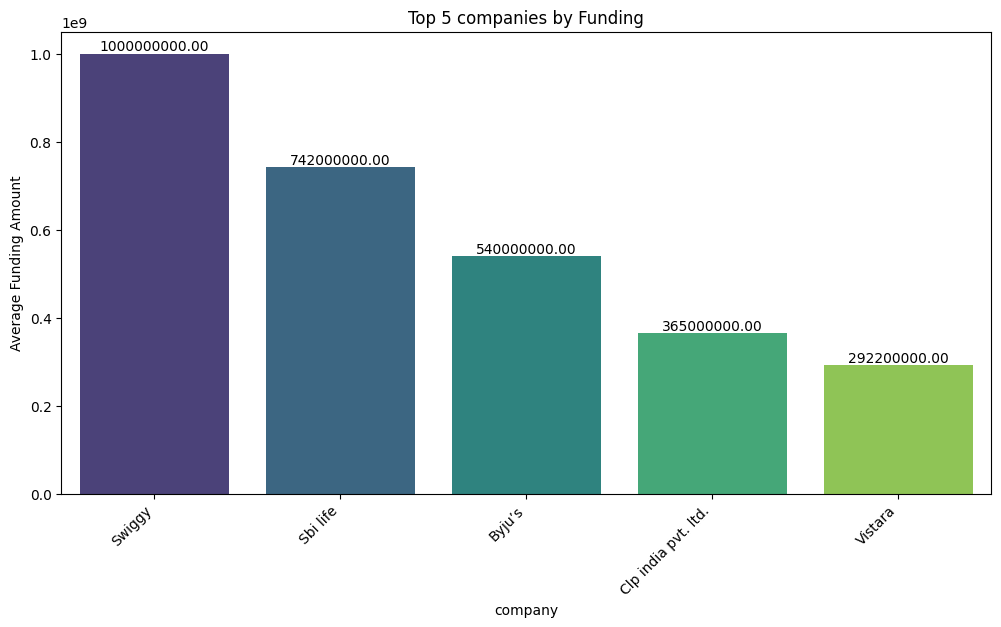

In [352]:
# Top 5 companies
top_companies = df_2018.groupby('company_name')['amount'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")
# Adding data labels
for index, value in enumerate(top_companies):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.title('Top 5 companies by Funding')
plt.xlabel('company')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Summary 2018 Data
1. The series with the highest frequency was 'seed'
2. The Industry with the highest investment in 2018 was insurance
3. The city and state with the highest frequency was Bangalore and Karnataka in the 2018 data set
4. The company with the highest funding was swiggy in 2018 with 1billlion dolars

#### Cleaning 2019 data 


In [353]:
# Checking the 2019 info
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  76 non-null     object 
 1   Founded        52 non-null     float64
 2   HeadQuarter    76 non-null     object 
 3   Sector         71 non-null     object 
 4   What it does   76 non-null     object 
 5   Founders       73 non-null     object 
 6   Investor       76 non-null     object 
 7   Amount($       76 non-null     int64  
 8   Stage          76 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 5.5+ KB


#### Data Overview
The dataset contains information on 76 entry rows across various attributes. Here's a summary of the key details:
  1. Company/Brand: Name of the company or brand. it has 76 non null entries
  2. Founded: Year of establishment. it has 52 non-null entries
  3. HeadQuarter: Location of the company's headquarters. It has 76 non-null entries
  4. Sector: Industry to which the company belongs. It has 71 non-null entries
  5. What it does: Description of the company's activities (76 non-null entries).
  6. Founders:Names of the founders (73 non-null entries).
  7. Investor:Information about investors (76 non-null entries).
  8. Amount($): Funding amount in dollars (76 non-null entries).
  9. Stage: the series of the funding (76 non-null entries).  



#### Renaming column names for 2019
This is to make sure the consistency in column names for merging later on

In [354]:
# Renaming the 2019 data set columns and putting them in lowercase
column_names_2019 = {'Company/Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount($':'amount', 'HeadQuarter': 'location', 'What it does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2019 = df_2019.rename(columns=column_names_2019)
df_2019.head()

,company_name,founded,location,industry,about,founders,investor,amount,series
0,Appnomic,NaN,Bengaluru,Saas,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,22000000,Unspecisfied
1,Asteria Aerospace,2011.0,Bengaluru,Robotics & Ai,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000,Unspecisfied
2,Awign Enterprises,2016.0,Bengaluru,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",4000000,Series A
3,Bijak,2019.0,Gurugram,Agritech,B2B platform for agricultural commodities.,"Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwa...","Omnivore and Omidyar Network India, Sequoia Ca...",2500000,Seed fund
4,Bombay Shaving,NaN,Gurugram,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,Unspecisfied


##### Checking for duplicates in 2019 data

In [355]:
# Checking for duplicates in the 2019 data and cleaning by droping duplicates
duplicated = df_2019[df_2019.duplicated()]
if duplicated.empty:
    print("Do nothing, there are 0 duplicates.")
else:
    # Remove duplicates
    df_2019_cleaned = df_2019.drop_duplicates()
    print("Cleaned the DataFrame by removing duplicates.")

Do nothing, there are 0 duplicates.


##### Cleaning 2019 columns

In [356]:
# Cleaning the company_name column
# Checking for unique values
print(f'There are : {df_2019['company_name'].nunique()} unique entries in the company_name column')

There are : 75 unique entries in the company_name column


In [357]:

df_2019['company_name'].value_counts()


company_name
Licious        2
Appnomic       1
Pibeam         1
Salaryfits     1
Ruangguru      1
              ..
Hungerbox      1
Homelane       1
Happyeasygo    1
Gomechanic     1
Zoomcar        1
Name: count, Length: 75, dtype: int64

Observation: The company_name column appears to be okay with Licious only appearing twice. this leave data as is and does not require further cleaning

In [358]:
# Cleaning the founded column
# Checking The unique values, nunique value, and value counts in the founded column
unique_values = df_2019['founded'].nunique()
null_values = df_2019['founded'].isna().sum()
print(f'The unique values in the founded column are: {unique_values}, '
      f'while the null values are: {null_values}')

The unique values in the founded column are: 12, while the null values are: 24


Observation 
1. The null values in the founded column can be left and not droped
2. The column should be converted to datetiome from object since it hold dates companies were founded

In [359]:
# Converting the founded column to datetime
df_2019['founded'] = pd.to_datetime(df_2019['founded'], format='%Y', errors='coerce')

In [360]:
# Cleaning the location column
# Checking unique values and null values 
print(f' There are : {df_2019['location'].nunique()} unique values in the 2019 data frame location column,'
      f'and : {df_2019['location'].isna().sum()} null values')

 There are : 18 unique values in the 2019 data frame location column,and : 0 null values


In [361]:
# Checking the data sample
df_2019['location'].unique()

array(['Bengaluru', 'Gurugram', 'Mumbai', 'Jaipur', 'Pune', 'Rajasthan',
       'Delhi', 'San Fransisco', 'Hyderabad', 'Chennai', 'Ahmedabad',
       'Noida', 'New Delhi', 'Telangana', 'Gurgaon', 'London', 'Surat',
       'Haryana'], dtype=object)

Observation:  
The location column will be seems okay with no null values and thus be left as is. the unique cities are 18

In [362]:
# Cleaning the industry column
# Checking unique values and null values 
print(f' There are : {df_2019['industry'].nunique()} unique values in the 2019 data frame Industry column,'
      f'and {df_2019['industry'].isna().sum()} null values')

 There are : 45 unique values in the 2019 data frame Industry column,and 5 null values


In [363]:
# checking industry entries
df_2019['industry'].unique()

array(['Saas', 'Robotics & Ai', nan, 'Agritech', 'Ecommerce',
       'E-Commerce', 'Foodtech', 'Edtech', 'Automobile', 'Logistics',
       'Jewellery', 'Banking', 'Automotive Tech', 'Ai', 'B2B',
       'E-Marketplace', 'Marketing & Customer Loyalty',
       'Automobile & Technology', 'Travel', 'Interior Design',
       'Virtual Banking', 'Infratech', 'Hr Tech', 'Fintech', 'Technology',
       'Legal Tech', 'Food', 'Food & Nutrition', 'Pharmaceutical',
       'E-Sports', 'Mutual Funds', 'Transportation', 'Hospitality',
       'Healthtech', 'Healthcare', 'Cosmetics', 'Ai & Tech',
       'Yoga & Wellness', 'Accomodation', 'Insurance Technology',
       'Social Media', 'Iot', 'Food & Tech', 'Cybersecurity',
       'Manufacturing', 'Transport & Rentals'], dtype=object)

Observation:  
1. The industry column can remain as is because the entries are single entry data for each industry cell
2. There are 45 unique industry entries in 2019 dataframe

In [364]:
# Checking the about/ founders, investor, and series columns 
print(f' There are : {df_2019['about'].nunique()} unique values in the 2019 data frame about column,'
      f'and {df_2019['about'].isna().sum()} null values\n'
      f' There are : {df_2019['founders'].nunique()} unique values in the 2019 data frame founders column,'
      f'and {df_2019['founders'].isna().sum()} null values\n'
      f' There are : {df_2019['investor'].nunique()} unique values in the 2019 data frame investor column,'
      f'and {df_2019['investor'].isna().sum()} null values\n'
      f' There are : {df_2019['series'].nunique()} unique values in the 2019 data frame series column,'
      f'and {df_2019['series'].isna().sum()} null values')

 There are : 75 unique values in the 2019 data frame about column,and 0 null values
 There are : 72 unique values in the 2019 data frame founders column,and 3 null values
 There are : 74 unique values in the 2019 data frame investor column,and 0 null values
 There are : 15 unique values in the 2019 data frame series column,and 0 null values


Observation:  
The rest of the columns appear to be good. with founders column with 3 null values. 

In [365]:
# Cleaning the amount column
df_2019['amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 76 entries, 0 to 75
Series name: amount
Non-Null Count  Dtype
--------------  -----
76 non-null     int64
dtypes: int64(1)
memory usage: 740.0 bytes


Observations:
The amount column appears okay. with 76 non null entries and all int datatypes.


#### Adding data year to 2019 dataframe

In [366]:
# adding the data year column for 2019
df_2019['data_year'] = pd.to_datetime('2019', format='%Y')


In [367]:
# Display the updated DataFrame info
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  76 non-null     object        
 1   founded       52 non-null     datetime64[ns]
 2   location      76 non-null     object        
 3   industry      71 non-null     object        
 4   about         76 non-null     object        
 5   founders      73 non-null     object        
 6   investor      76 non-null     object        
 7   amount        76 non-null     int64         
 8   series        76 non-null     object        
 9   data_year     76 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 6.1+ KB


In [368]:
# Checking clean 2019 data-frame
df_2019.head(3)

,company_name,founded,location,industry,about,founders,investor,amount,series,data_year
0,Appnomic,NaT,Bengaluru,Saas,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,22000000,Unspecisfied,2019-01-01
1,Asteria Aerospace,2011-01-01,Bengaluru,Robotics & Ai,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000,Unspecisfied,2019-01-01
2,Awign Enterprises,2016-01-01,Bengaluru,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",4000000,Series A,2019-01-01


##### Brief EDA on 2019 Data

In [369]:
# 1. Describe the data frame for 2019
df_2019.describe(include='all')

,company_name,founded,location,industry,about,founders,investor,amount,series,data_year
count,76,52,76,71,76,73,76,7.600000e+01,76,76
unique,75,NaN,18,45,75,72,74,NaN,15,NaN
top,Licious,NaN,Bengaluru,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,NaN,Unspecisfied,NaN
freq,2,NaN,25,7,2,2,2,NaN,37,NaN
mean,NaN,2014-07-09 12:00:00,NaN,NaN,NaN,NaN,NaN,4.388728e+07,NaN,2019-01-01 00:00:00
min,NaN,2004-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+05,NaN,2019-01-01 00:00:00
25%,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2.400000e+06,NaN,2019-01-01 00:00:00
50%,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,6.000000e+06,NaN,2019-01-01 00:00:00
75%,NaN,2016-04-01 12:00:00,NaN,NaN,NaN,NaN,NaN,3.000000e+07,NaN,2019-01-01 00:00:00
max,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,6.930000e+08,NaN,2019-01-01 00:00:00


#### Analysis of df_2019 Data Frame
1. Company Name:  There are 75 unique company names.The most common company name is lucious," appearing twice.
2. Founded:  The data reflects the founding dates of 52 companies.The earliest company was founded in 2004.The latest company was founded in 2019.
3. City:  The data includes companies from 18 different cities.Bengaluru is the most frequent city, with 25 occurrences.
4. Industry:  There are 45 unique industries represented in the data. Edtech is the most common industry, appearing 7 times.
5. About: There are 76 unique descriptions of companies. The most frequent description is "Online meat shop," appearing twice.
6. Founders:  There are details for 73 founders.Vivek Gupta and Abhay Hanjura are the most frequent founders, appearing twice.
7. Investor:  There are details for 76 unique investors. The most common investor is "Undisclosed," mentioned 3 times.
8. Amount:  Funding amounts are available for 76 companies.The funding amount ranges from $100,000 to $693,000,000.
The average funding amount is $43,330,000.
9. Series:  There are details for 15 unique series.Unspecified is the most common funding series, occurring 37 times.
10. Data Year: All entries in the data belong to the data collection year 2019.

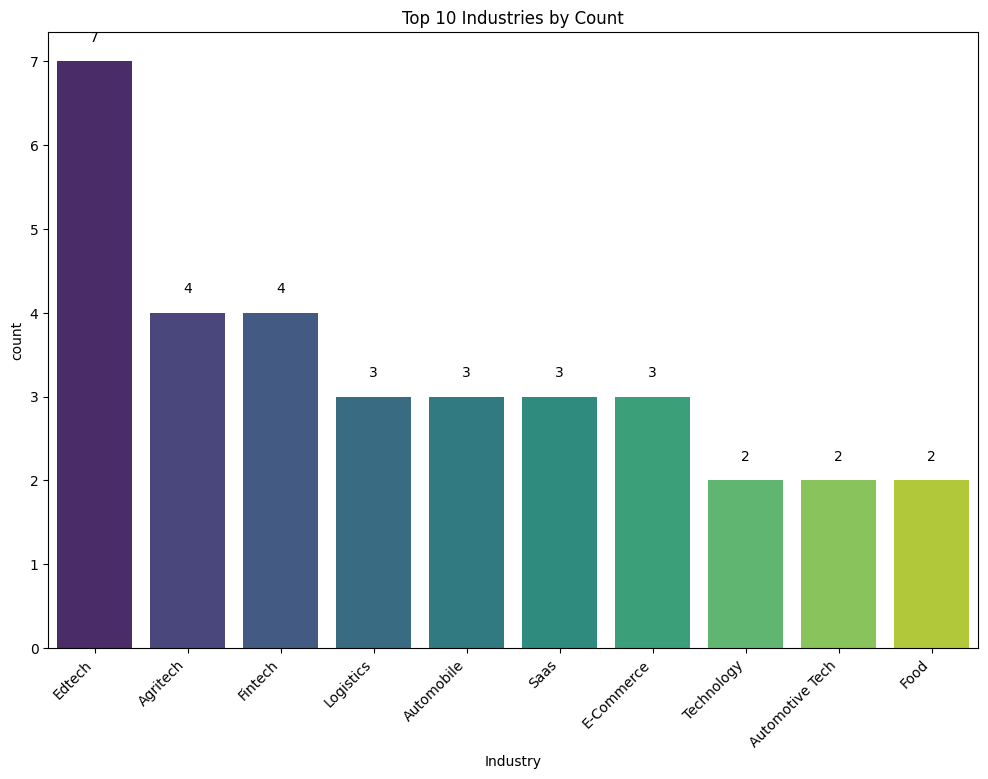

In [370]:
# 1 Distribution of Industries (Bar Chart)
plt.figure(figsize=(12, 8))
industry_distribution = df_2019['industry'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=industry_distribution.index, y=industry_distribution.values, palette='viridis')
plt.title('Top 10 Industries by Count')
plt.xlabel('Industry')
plt.ylabel('count')
# Add data labels to the bar chart
for i, value in enumerate(industry_distribution):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

Edtech is the industry with the highest distribution for 2019

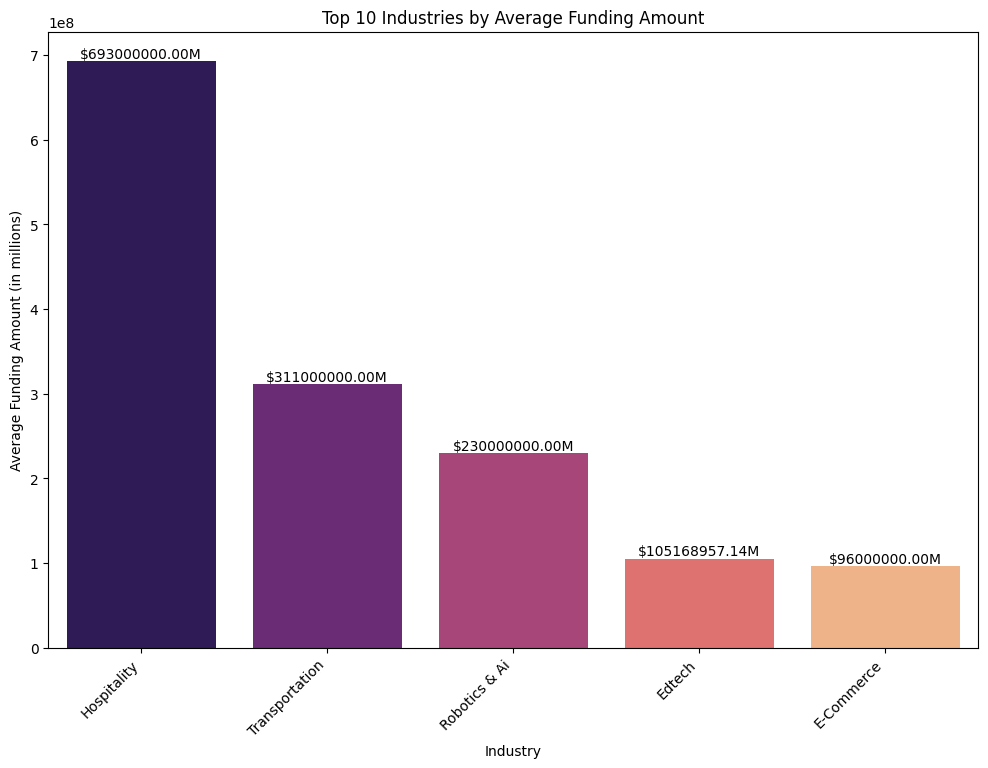

In [371]:
# 2 Average Funding Amount by Industry - Top 5 (Bar Chart)
plt.figure(figsize=(12, 8))
avg_funding_by_industry = df_2019.groupby('industry')['amount'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=avg_funding_by_industry.index, y=avg_funding_by_industry.values, palette='magma')
plt.title('Top 10 Industries by Average Funding Amount')
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount (in millions)')
# Add data labels to the bar chart
for i, value in enumerate(avg_funding_by_industry):
    plt.text(i, value + 0.2, f'${value:.2f}M', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Cleaning 2020 data

In [372]:
# Loading the 2020 dat frame 
df_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,1Mg,2015.0,Gurugram,Healthtech,Online pharmacy,"Prashant Tandon, Gaurav Agarwal, Vikas Chauhan",Bill & Melinda Gates Foundation,9900000,unspecified
1,3One4 Capital,2016.0,Bangalore,Venture capital,Use transformative capital and a deep involvem...,"Pranav Pai, Siddarth Pai",NaN,100000000,unspecified
2,5C Network,2014.0,Bangalore,HealthTech,"5C is India's first Diagnostics Network, makin...",Kalyan Sivasailam,"Axilor Ventures, Unitus Ventures",1200000,Pre-series A


In [373]:
# Checking 2020 information on dataset
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  784 non-null    object 
 1   Founded        645 non-null    float64
 2   HeadQuarter    784 non-null    object 
 3   Sector         773 non-null    object 
 4   What_it_does   784 non-null    object 
 5   Founders       777 non-null    object 
 6   Investor       758 non-null    object 
 7   Amount         784 non-null    int64  
 8   Stage          784 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 55.3+ KB


##### Data Info summary for raw data df_2020  
There are Entries 784 rows in the dataframe for 2020 and 9 columns  
Column Information:  
1. Company_Brand - 784 entries and no nulls. all object entries
2. Founded - 645 entries, float d-type, with null values
3. HeadQuarter - 784 entries, object d-type, with no null values
4. Sector - 773 entries, object d-type, with null values
5. What_it_does - 784 entries and no nulls. all object entries
6. Founders - 777 entries, object d-type, with null values
7. Investor - 758 entries, object d-type, with null values
8. Amount - 784 entries, int64 d-type, with  no null values
9. Stage - 784 entries, object d-type, with no null values

In [374]:
# Cleaning the df_2020 data set
# First converting the column names for readability and consistency with the 2018 and 2019 data
# Dropping the column 10 since its unsusable for any meaningful insights
# Renaming the 2019 data set columns and putting them in lowercase
column_names_2020 = {'Company_Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount': 'amount', 'HeadQuarter': 'location', 'What_it_does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2020 = df_2020.rename(columns=column_names_2020)


In [375]:
# Checking for duplicates in the 2020 data and cleaning by droping duplicates
duplicated1 = df_2020[df_2020.duplicated()]
if duplicated1.empty:
    print("Do nothing, there are 0 duplicates.")
else:
    # Remove duplicates
    df_2020_cleaned = df_2020.drop_duplicates()
    print("Cleaned the DataFrame by removing duplicates.")

Do nothing, there are 0 duplicates.


In [376]:
# Checking the object columns company name, city, industry, about, founders, investor, series for the unique values
columns_2020 = ['company_name', 'location', 'industry', 'about', 'founders', 'investor', 'series']
unique_values_df = df_2020[columns_2020].apply(lambda x: x.nunique())
# Display the DataFrame with unique values
unique_values_df

company_name    668
location         64
industry        242
about           740
founders        704
investor        657
series           36
dtype: int64

Observation  
These unique values provide insights into the diversity and variety present in the dataset across different attributes such as company names, locations, industries, founders, investors, and series categories.  
Company Name: There are 668 unique company names in the 2020 dataset.  
location: The 2020 dataset includes information from 64 different cities.  
Industry: There are 242 unique industries represented in the 2020 dataset.  
About: The 'about' column contains 740 unique descriptions about the companies activities.  
Founders: The 2020 dataset lists information about 704 unique founders.  
Investor: There are records for 657 unique investors in the 2020 dataset.
Series: The 'series' column consists of 36 unique series categories for when the funding round occurred.

In [377]:
# Cleaning the Founded column because its a float and should be time series data
# Converting the founded column to datetime
df_2020['founded'] = pd.to_datetime(df_2020['founded'], format='%Y', errors='coerce')

In [378]:
# Checking the amount column
df_2020['amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 784 entries, 0 to 783
Series name: amount
Non-Null Count  Dtype
--------------  -----
784 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


Observation  
It appears all the entries in the amount column  are int64 with no outliers.  
The column will remain as is

##### Adding data year to 2020 dataframe


In [379]:
# Adding data year column to the 2020 dataset
df_2020['data_year'] = pd.to_datetime('2020', format='%Y')

# List of columns with object data that need to be capitalized
columns_to_capitalize = ['company_name', 'location', 'industry', 'about', 'founders', 'investor', 'series']

# Capitalize the first letter of each string in the specified columns
df_2020[columns_to_capitalize] = df_2020[columns_to_capitalize].apply(lambda x: x.str.capitalize())
# Display the updated DataFrame info
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  784 non-null    object        
 1   founded       645 non-null    datetime64[ns]
 2   location      784 non-null    object        
 3   industry      773 non-null    object        
 4   about         784 non-null    object        
 5   founders      777 non-null    object        
 6   investor      758 non-null    object        
 7   amount        784 non-null    int64         
 8   series        784 non-null    object        
 9   data_year     784 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 61.4+ KB


#### Performing Brief EDA on 2020 clean data

In [380]:
# A brief description of the data frame
df_2020.describe(include='all')

,company_name,founded,location,industry,about,founders,investor,amount,series,data_year
count,784,645,784,773,784,777,758,7.840000e+02,784,784
unique,668,NaN,64,227,740,703,651,NaN,32,NaN
top,Zomato,NaN,Bangalore,Fintech,Onine learning platform,Sreevathsa prabhakar,Inflection point ventures,NaN,Unspecified,NaN
freq,6,NaN,263,106,4,4,9,NaN,314,NaN
mean,NaN,2015-02-18 18:51:54.418604544,NaN,NaN,NaN,NaN,NaN,1.140959e+08,NaN,2020-01-01 00:00:00
min,NaN,1973-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN,2020-01-01 00:00:00
25%,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020-01-01 00:00:00
50%,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020-01-01 00:00:00
75%,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.100000e+07,NaN,2020-01-01 00:00:00
max,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,7.000000e+10,NaN,2020-01-01 00:00:00


#### Data Summary (2020)
The Total Records are 784 row entries 
1. Founders and Cities: the unique founders are 703 while the unique cities are 64 with the most common city being Bangalore (263 occurrences)
2. Industries: there are 227 unique industries with the most common industry being Fintech (106 occurrences)
3. Funding Rounds: there was a total of 784 funding rounds with Series A (314 occurrences) being the most common series: 
4. Funding Amount:  
- the Mean funding amount was $114,095,900  
- the Minimum funding amount was $12,700  
- the Maximum funding amount was $70,000,000,000  
- the Funding amount standard deviation: $2,503,298,000
5. Startup Founded Dates: the oldest startup was founded in 1973, while the latestest startup was founded in 2020
6. About Startups: the Top startup was Zomato (6 occurrences) which Provides online learning classes
7. Investors: there was 651 Unique investors with inflection point ventures (9 occurrences) being the investor that had the highest frequency:


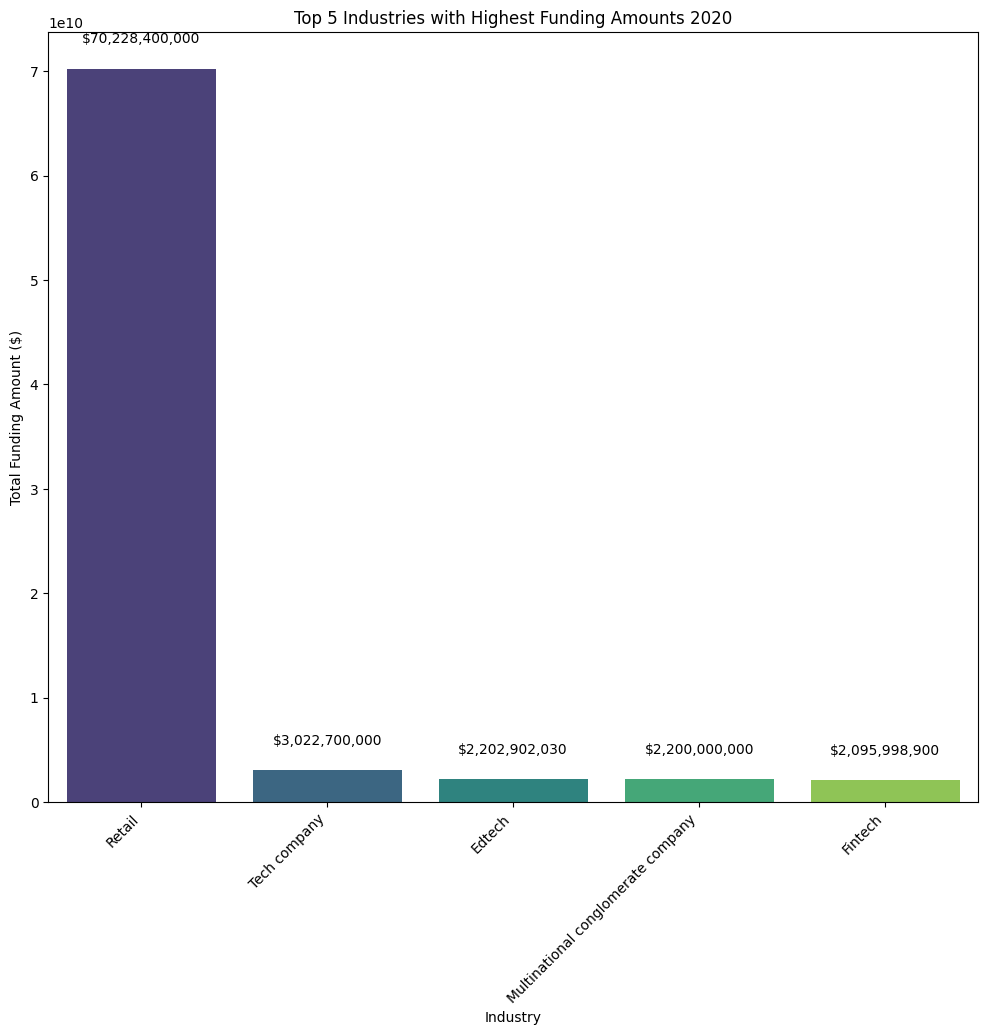

In [381]:
# Filter out rows where 'amount' is not null
df_filtered = df_2020[df_2020['amount'].notnull()]
# Group by 'industry' and calculate the total funding amount for each industry
industry_funding = df_filtered.groupby('industry')['amount'].sum().sort_values(ascending=False)
# Select the top 5 industries
top5_industries = industry_funding.head(5)
# Plot a bar chart for the top 5 industries with the highest funding amounts
plt.figure(figsize=(12, 10))
sns.barplot(x=top5_industries.index, y=top5_industries.values, palette='viridis')
plt.title('Top 5 Industries with Highest Funding Amounts 2020')
plt.xlabel('Industry')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')
# Add data labels
for i, amount in enumerate(top5_industries.values):
    plt.text(i, amount + 0.05 * max(top5_industries.values), f"${amount:,.0f}", ha='center', va='top')
plt.show()

Observation  
Retail Had the highest funding in the year 2020

Top 5 Industries with the Most Companies:
industry
Fintech       91
Edtech        63
Agritech      28
E-commerce    27
Healthtech    27
Name: company_name, dtype: int64


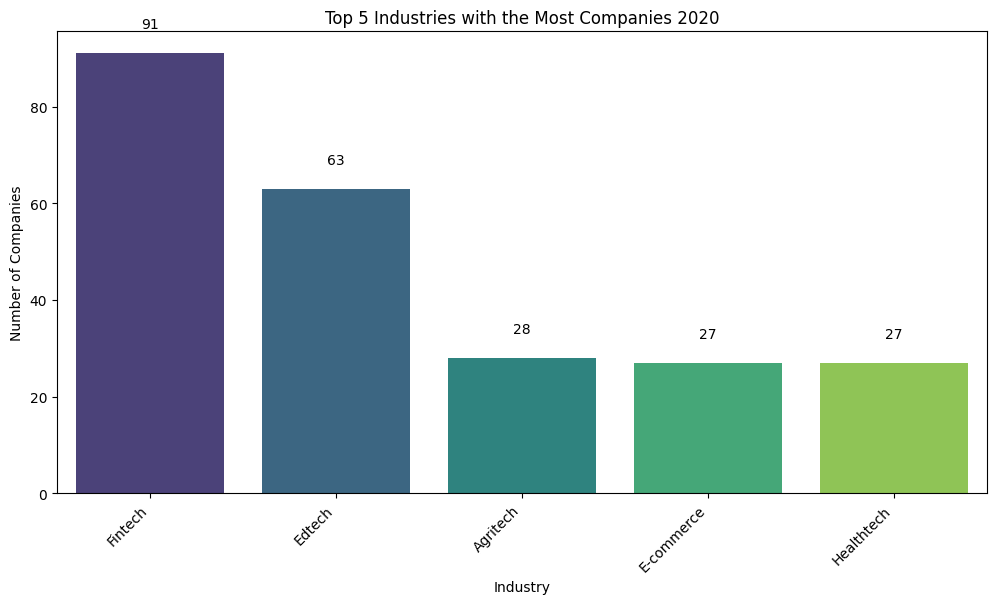

In [382]:
# Group by industry and count unique company names
industry_company_counts = df_2020.groupby('industry')['company_name'].nunique()
# Top 5 industries with the most companies
top5_industries_by_companies = industry_company_counts.nlargest(5)
print("Top 5 Industries with the Most Companies:")
print(top5_industries_by_companies)
# Bar plot for the top 5 industries with the most companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top5_industries_by_companies.index, y=top5_industries_by_companies.values, palette='viridis')
plt.title('Top 5 Industries with the Most Companies 2020')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
# Adding data labels
for i, count in enumerate(top5_industries_by_companies.values):
    plt.text(i, count + 0.05 * max(top5_industries_by_companies.values), str(count), ha='center', va='bottom')
plt.show()

### Cleaning 2021 data

In [383]:
# Checking to see 2021 data info
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1034 non-null   object 
 1   Founded        1033 non-null   float64
 2   HeadQuarter    1034 non-null   object 
 3   Sector         1033 non-null   object 
 4   What_it_does   1034 non-null   object 
 5   Founders       1030 non-null   object 
 6   Investor       977 non-null    object 
 7   Amount         1034 non-null   int64  
 8   Stage          1034 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 72.8+ KB


Observation:  
1. There are 1034 entries in the dataset, indicating information about 1034 companies.
2. The 'Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', and 'Stage' columns contain text or categorical data (object dtype).
3. The 'Founded' column represents the year each company was founded and is of float64 dtype. It has 1033 non-null entries, indicating one missing value.
4. The 'Amount' column represents some kind of financial amount and is of int64 dtype.
5. The 'Investor' column has 977 non-null entries, suggesting that there are 57 missing values in this column.
6. The 'Stage' column likely represents the stage of development or funding stage of each company.  

Overall, this DataFrame contains data about companies, including their brand, founding year, headquarters, sector, what they do, founders, investors, funding amount, and stage of development. There are a few missing values in the 'Founded' and 'Investor' columns that may need to be addressed depending on the analysis or tasks being performed with this data.

#### Renaming 2021 column names

In [384]:
# Cleaning the titles of the 2021 data frame 
column_names_2021 = {'Company_Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount': 'amount', 'HeadQuarter': 'location', 'What_it_does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2021 = df_2021.rename(columns=column_names_2021)
# Drop 'column_10', 
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1034 non-null   object 
 1   founded       1033 non-null   float64
 2   location      1034 non-null   object 
 3   industry      1033 non-null   object 
 4   about         1034 non-null   object 
 5   founders      1030 non-null   object 
 6   investor      977 non-null    object 
 7   amount        1034 non-null   int64  
 8   series        1034 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 72.8+ KB


In [385]:
# Checking for duplicates in the 2021 data
# Checking for duplicates in the 2020 data and cleaning by droping duplicates
duplicated2 = df_2021[df_2021.duplicated()]
if duplicated2.empty:
    print("Do nothing, there are 0 duplicates.")
else:
    # Remove duplicates
    df_2021_cleaned = df_2021.drop_duplicates()
    print("Cleaned the DataFrame by removing duplicates.")

Do nothing, there are 0 duplicates.


In [386]:
# List of columns with object data that need to be capitalized
columns_to_capitalize = ['company_name', 'location', 'industry', 'about', 'founders', 'investor', 'series']

# Capitalize the first letter of each string in the specified columns
df_2021[columns_to_capitalize] = df_2021[columns_to_capitalize].apply(lambda x: x.str.capitalize())
# Display the updated DataFrame info

In [387]:
# Converting the founded column into datetime
df_2021['founded'] = pd.to_datetime(df_2021['founded'], format='%Y', errors='coerce')

In [388]:
df_2021['amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1034 entries, 0 to 1033
Series name: amount
Non-Null Count  Dtype
--------------  -----
1034 non-null   int64
dtypes: int64(1)
memory usage: 8.2 KB


Observation:  
The amount column has 1034 non null entries all int64 datatypes

#### Adding data year column

In [389]:
# Adding data year column to the 2021 dataset
df_2021['data_year'] = pd.to_datetime('2021', format='%Y')

In [390]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  1034 non-null   object        
 1   founded       1033 non-null   datetime64[ns]
 2   location      1034 non-null   object        
 3   industry      1033 non-null   object        
 4   about         1034 non-null   object        
 5   founders      1030 non-null   object        
 6   investor      977 non-null    object        
 7   amount        1034 non-null   int64         
 8   series        1034 non-null   object        
 9   data_year     1034 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 80.9+ KB


From the above, the 2021 data frame seems to be clean enough for analysis

#### Performing EDA on 2021 data

In [391]:
# A brief description of the data frame
df_2021.describe(include='all')

,company_name,founded,location,industry,about,founders,investor,amount,series,data_year
count,1034,1033,1034,1033,1034,1030,977,1.034000e+03,1034,1034
unique,910,NaN,55,223,1003,966,827,NaN,27,NaN
top,Bharatpe,NaN,Bengaluru,Fintech,Byju's is an educational technology company th...,"Ashneer grover, shashvat nakrani",Inflection point ventures,NaN,Unspecified,NaN
freq,6,NaN,371,106,4,6,21,NaN,343,NaN
mean,NaN,2016-06-28 22:07:05.169409536,NaN,NaN,NaN,NaN,NaN,2.844016e+07,NaN,2021-01-01 00:00:00
min,NaN,1963-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+04,NaN,2021-01-01 00:00:00
25%,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2021-01-01 00:00:00
50%,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3.500000e+06,NaN,2021-01-01 00:00:00
75%,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.500000e+07,NaN,2021-01-01 00:00:00
max,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+09,NaN,2021-01-01 00:00:00


## Exploratory Data Analysis (EDA) Notes - df_2021 DataFrame  
### Columns Analysis:
Understood, here are the observations without using bullet points for the column descriptions:

1. Company Name: There are 1034 unique company names, with "Bharatpe" being the most frequent (6 occurrences).
2. Founded: The founding dates range from 1963 to 2021, with the mean founding date around June 28, 2016.
3. Location: There are 55 unique locations, with Bengaluru being the most frequent (371 occurrences).
4. Industry: There are 223 unique industry categories, with "Fintech" being the most frequent (106 occurrences).
5. About: There are 1003 unique company descriptions, with the most common being related to Byju's (4 occurrences).
6. Founders: There are 966 unique sets of founders, with Bharatpe's founders being the most frequent (6 occurrences).
7. Investor: There are 827 unique investors, with Inflection Point Ventures being the most frequent (21 occurrences).
8. Amount: The funding amounts range from 10,000 to 1,000,000,000, with a mean of approximately 28,440,160.
9. Series: There are 27 unique funding round series, with "Unspecified" being the most frequent.  

These observations provide insights into the diversity of companies, their founding dates, locations, industries, funding amounts, and other aspects captured in the dataset.


## Data Merging for analysis
At this point all the four data sets will be merged into one for final cleaning and analysis

In [392]:
# Merging the data
data_frames = [df_2018, df_2019, df_2020, df_2021]

# Concatenate dataframes vertically (along rows)
df = pd.concat(data_frames, ignore_index=True)

In [393]:
# Previewing the info of the merged data-frame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  2271 non-null   object        
 1   industry      2234 non-null   object        
 2   series        2271 non-null   object        
 3   amount        2271 non-null   float64       
 4   location      2271 non-null   object        
 5   about         2271 non-null   object        
 6   data_year     2271 non-null   datetime64[ns]
 7   founded       1730 non-null   datetime64[ns]
 8   founders      1880 non-null   object        
 9   investor      1811 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 177.6+ KB


In [394]:
# Previewing the new data frame 
df.head()

,company_name,industry,series,amount,location,about,data_year,founded,founders,investor
0,Ola,Apps,Unspecified,50000000.0,Kormangala,Ola is a mobile app that brings together cab d...,2018-01-01,NaT,NaN,NaN
1,Walmart india,Retail,Unspecified,37680000.0,Gurgaon,Wal-mart india private limited is a wholly own...,2018-01-01,NaT,NaN,NaN
2,Veritas finance,Financial services,Unspecified,30000000.0,Guindy,Veritas finance has been promoted with a prima...,2018-01-01,NaT,NaN,NaN
3,Rays power infra,Energy,Unspecified,29220000.0,Jaipur,Rays power infra is a leading integrated solar...,2018-01-01,NaT,NaN,NaN
4,Vivriti capital,Financial services,Unspecified,28500000.0,Chennai,Vivriti capital is an online platform for inst...,2018-01-01,NaT,NaN,NaN


In [395]:
df.describe(include='all')

,company_name,industry,series,amount,location,about,data_year,founded,founders,investor
count,2271,2234,2271,2.271000e+03,2271,2271,2271,1730,1880,1811
unique,1747,475,68,NaN,107,2161,NaN,NaN,1661,1483
top,Byju's,Fintech,Unspecified,NaN,Bengaluru,Byju's is an educational technology company th...,NaN,NaN,"Ashneer grover, shashvat nakrani",Inflection point ventures
freq,8,218,688,NaN,555,4,NaN,NaN,6,30
mean,NaN,NaN,NaN,5.673102e+07,NaN,NaN,2020-02-03 05:49:22.747688192,2015-12-05 07:00:20.809248768,NaN,NaN
min,NaN,NaN,NaN,8.766000e+02,NaN,NaN,2018-01-01 00:00:00,1963-01-01 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+06,NaN,NaN,2020-01-01 00:00:00,2015-01-01 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,3.000000e+06,NaN,NaN,2020-01-01 00:00:00,2017-01-01 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,1.200000e+07,NaN,NaN,2021-01-01 00:00:00,2019-01-01 00:00:00,NaN,NaN
max,NaN,NaN,NaN,7.000000e+10,NaN,NaN,2021-01-01 00:00:00,2021-01-01 00:00:00,NaN,NaN


### Cleaning Merged dataframe


#### Cleaning the industry column

In [396]:
# Checking the industry column description
df['industry'].describe()

count        2234
unique        475
top       Fintech
freq          218
Name: industry, dtype: object

Observation:  
The Industry column has 2234 entires with 475 unique industries
1. The industry column needs to be cleaned and for this exercise, I decided to use Excel to map the industries into 18 different industries.
2. The mapping was done by creating a new data set with only tow columns. The industry column from df and a new industry_mapped column in the new data frame named industry mapped dataset.
3. We will use this new data frame to create a new industry column that is clean and easy to use for analysis. This will be achived by merging both dataframes using the industry column

#### Mapping the 'industry' column

In [397]:
# Importing the industry mapped dataframe
industry_df = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/industry_mapped.xlsx")

In [398]:
# Checking the industry_df dataframes
industry_df.head()

,industry,industry_mapped
0,Apps,Technology
1,Accomodation,"Food, Hospitality and Tourism"
2,Accomodation,"Food, Hospitality and Tourism"
3,Accomodation,"Food, Hospitality and Tourism"
4,Accounting,Financial Services


In [399]:
# Create a dictionary mapping industries to mapped industries
industry_mapping = dict(zip(industry_df['industry'], industry_df['industry_mapped']))
# Use the map function to apply the mapping to the 'industry' column in df
df['clean_industry'] = df['industry'].map(industry_mapping)
# Fill null entries in 'clean_industry' with 'Other'
df['clean_industry'].fillna('Other', inplace=True)


In [400]:
df.head(3)

,company_name,industry,series,amount,location,about,data_year,founded,founders,investor,clean_industry
0,Ola,Apps,Unspecified,50000000.0,Kormangala,Ola is a mobile app that brings together cab d...,2018-01-01,NaT,NaN,NaN,Technology
1,Walmart india,Retail,Unspecified,37680000.0,Gurgaon,Wal-mart india private limited is a wholly own...,2018-01-01,NaT,NaN,NaN,Retail
2,Veritas finance,Financial services,Unspecified,30000000.0,Guindy,Veritas finance has been promoted with a prima...,2018-01-01,NaT,NaN,NaN,Financial Services


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company_name    2271 non-null   object        
 1   industry        2234 non-null   object        
 2   series          2271 non-null   object        
 3   amount          2271 non-null   float64       
 4   location        2271 non-null   object        
 5   about           2271 non-null   object        
 6   data_year       2271 non-null   datetime64[ns]
 7   founded         1730 non-null   datetime64[ns]
 8   founders        1880 non-null   object        
 9   investor        1811 non-null   object        
 10  clean_industry  2271 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 195.3+ KB


Observation:  
- Since we no longer need the old industry column, I will drop the it and rename the clean_industry to industry 
- Also, there are columns that I deem unnecessary for the analysis going forward these include:
    1. about - it will provide no relevant data for analysis
    2. founded - our business questions do not include anything on founding year
    3. founders - our business questions do not include anything on founders
    4. investor - our business questions do not include anything on inverstors

#### Dropping Unnecessary Columns in df

In [402]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['founders', 'about', 'industry', 'investor', 'founded']
df.drop(columns=columns_to_drop, inplace=True)


In [403]:
# renaming the clean_industry to industry
df.rename(columns={'clean_industry': 'industry'}, inplace=True)

In [404]:
# Checking data_frame_info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  2271 non-null   object        
 1   series        2271 non-null   object        
 2   amount        2271 non-null   float64       
 3   location      2271 non-null   object        
 4   data_year     2271 non-null   datetime64[ns]
 5   industry      2271 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 106.6+ KB


Observations:  
1. The final df data frame has 2271 row entries
2. There are 6 columns
    - company_name - 2271 entries with object data type with no null values
    - series - 2271 entries with object data type with no null values
    - amount - 2271 entries with float data type with no null values
    - location - 2271 entries with object data type with no null values
    - data_year - 2271 entries with datetime data type with no null values
    - industry - 2271 entries with object data type with no null values  
     
Overall, the DataFrame appears to be well-structured with no missing values, making it suitable for analysis and visualization tasks related to company data, funding, and industry categorization.

## Performing EDA on the merged dataframe

In [151]:
# The data frame description
df.describe(include = 'all')

,company_name,industry,series,amount,location,about,data_year,founded,founders,investor,Category,category
count,2271,2234,2271,2.271000e+03,2271,2271,2271,1730,1880,1811,2271,2271
unique,1747,475,68,NaN,107,2161,NaN,NaN,1661,1483,15,15
top,Byju's,Fintech,Unspecified,NaN,Bengaluru,Byju's is an educational technology company th...,NaN,NaN,"Ashneer grover, shashvat nakrani",Inflection point ventures,Other,Other
freq,8,218,688,NaN,555,4,NaN,NaN,6,30,1289,1289
mean,NaN,NaN,NaN,5.673102e+07,NaN,NaN,2020-02-03 05:49:22.747688192,2015-12-05 07:00:20.809248768,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,8.766000e+02,NaN,NaN,2018-01-01 00:00:00,1963-01-01 00:00:00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+06,NaN,NaN,2020-01-01 00:00:00,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000e+06,NaN,NaN,2020-01-01 00:00:00,2017-01-01 00:00:00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.200000e+07,NaN,NaN,2021-01-01 00:00:00,2019-01-01 00:00:00,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,7.000000e+10,NaN,NaN,2021-01-01 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN,NaN


#### DataFrame Analysis
This dataframe contains information about various companies, including details such as company name, industry, funding series, funding amount, description, location (city and state), data year, founding date, founders, investors, and a clean version of the industry.
1. Company Name: The dataframe consists of 2856 entries with 2166 unique company names. The most frequent company name is "Bharatpe" with 10 occurrences.
2. Industry: There are 2837 non-null entries in the industry column, distributed across 559 unique industries. "Fintech" is the most common industry, appearing 265 times.
3. Funding Series: There are 1926 non-null entries indicating the funding series, with 73 unique series. The most common series is "Seed", occurring 601 times.
4. Amount (USD): The funding amount column contains 2302 non-null entries, with the minimum funding amount being $876 and the maximum being $150 billion. The mean funding amount is approximately $121.47 million, with a standard deviation of around $3.45 billion.
5. About: The about column provides descriptions of the companies, with 2692 unique descriptions. The top description mentions "Byju's," an educational technology company.
6. Location (City and State): The dataframe includes information about the location of companies, with 2735 non-null entries for cities and 525 non-null entries for states. The most frequent city is Bangalore, Karnataka, occurring 859 times.
7. Data Year: The data spans from 2018 to 2021, with a majority of entries falling in the year 2020.
8. Founding Date: The founding date of companies ranges from 1963 to 2021, with a mean founding date of January 25, 2016.
9. Founders: The dataframe contains information about the founders of companies, with 2312 non-null entries.
10. Investors: There are 2229 non-null entries for investors.
11. Clean Industry: The clean industry column has 15 unique categories.
Overall, the dataframe provides comprehensive insights into the landscape of companies, their industries, funding details, and locations.

##### Droping unsusable columns
The columns to be droped include , 'founders', 'about', 'industry' and 'investor'. This is because the data in this columns will not be used for any analyisis in the questions.

In [814]:
# Drop the specified columns from the DataFrame
df.drop(columns=['founders', 'about', 'industry', 'investor'], inplace=True)

In [815]:
# Viewing the new df data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company_name    2856 non-null   object        
 1   series          1926 non-null   object        
 2   amount          2302 non-null   float64       
 3   city            2735 non-null   object        
 4   state           525 non-null    object        
 5   data_year       2856 non-null   datetime64[ns]
 6   founded         2088 non-null   datetime64[ns]
 7   clean_industry  2856 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 178.6+ KB


## HYPOTHESIS TESTING 
I want to answer the following hypothesis  
1. Null Hypothesis (HO) - The amount of funding for companies is not influenced by the company's industry.  
2. Alternate Hypothesis (H1) - The amount of funding for companies is influenced by the company's industry.  

In [827]:

# Drop rows where either 'industry' or 'amount' is null
df_cleaned = df.dropna(subset=['clean_industry', 'amount'])
# Perform ANOVA
f_statistic, p_value = f_oneway(*[group['amount'] for name, group in df_cleaned.groupby('clean_industry')])
# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)
# Set the significance level (e.g., 0.05)
alpha = 0.05
# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the amount of funding is influenced by the company's industry.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the amount of funding is influenced by the company's industry.")

F-statistic: 0.7422597251300063
P-value: 0.7327512528845155
Fail to reject the null hypothesis. There is no significant evidence that the amount of funding is influenced by the company's industry.


##### Observation of Hypothesis test
Since the p-value (0.73275) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means that there is no significant evidence to suggest that the amount of funding is influenced by the company's industry.  
In other words, based on the analysis, there is insufficient statistical evidence to conclude that the industry of a company has a significant impact on the amount of funding it receives. The result suggests that factors other than industry may play a more dominant role in determining the funding amount for companies. Further investigation or analysis may be required to identify these factors.

### Further analysis on data

In [817]:
# Checking new dataframe
df.head()

,company_name,series,amount,city,state,data_year,founded,clean_industry
0,Thecollegefever,Seed,250000.0,Bangalore,Karnataka,2018-01-01,NaT,Consulting
1,Happy cow dairy,Seed,584000.0,Mumbai,Maharashtra,2018-01-01,NaT,Other
2,Myloancare,Series a,949000.0,Gurgaon,Haryana,2018-01-01,NaT,Finance
3,Payme india,Angel,2000000.0,Noida,Uttar pradesh,2018-01-01,NaT,Finance
4,Eunimart,Seed,NaN,Hyderabad,Andhra pradesh,2018-01-01,NaT,E-commerce


### Answering business questions

Question 1:  How does the distribution of funding amounts vary across different industries?

#### Using a pie chart

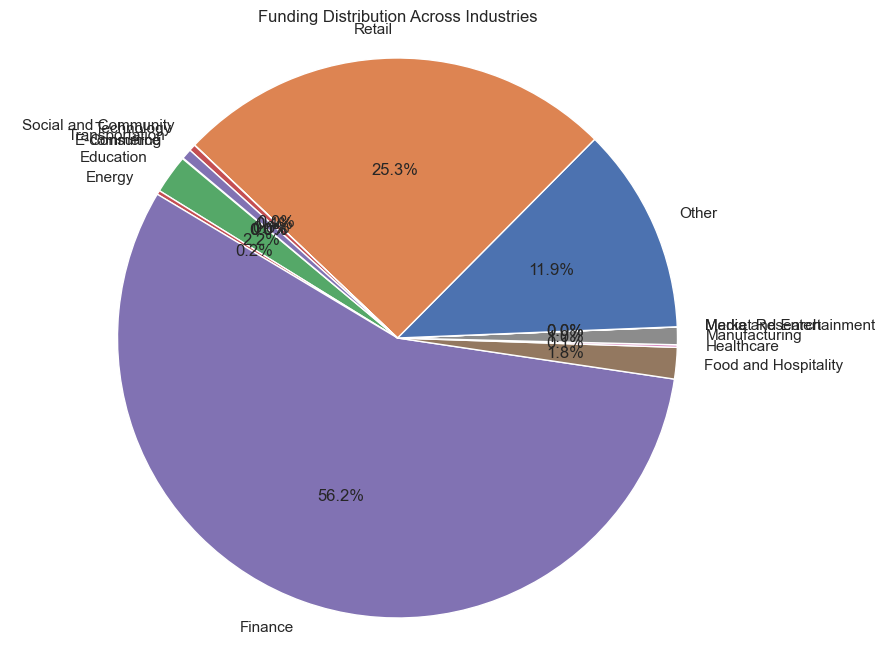

In [818]:
# Calculate the total funding amount for each clean industry
industry_funding = df.groupby('clean_industry')['amount'].sum()
# Create a pie chart to visualize the funding distribution
plt.figure(figsize=(10, 8))
plt.pie(industry_funding, labels=industry_funding.index, autopct='%1.1f%%', startangle=140)
plt.title('Funding Distribution Across Industries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The above shows that finance 56.2% had the highest frequency of funding and then retail. This means there is a higher chance of getting funding in the finance industry than any other.

#### Using a violin plot

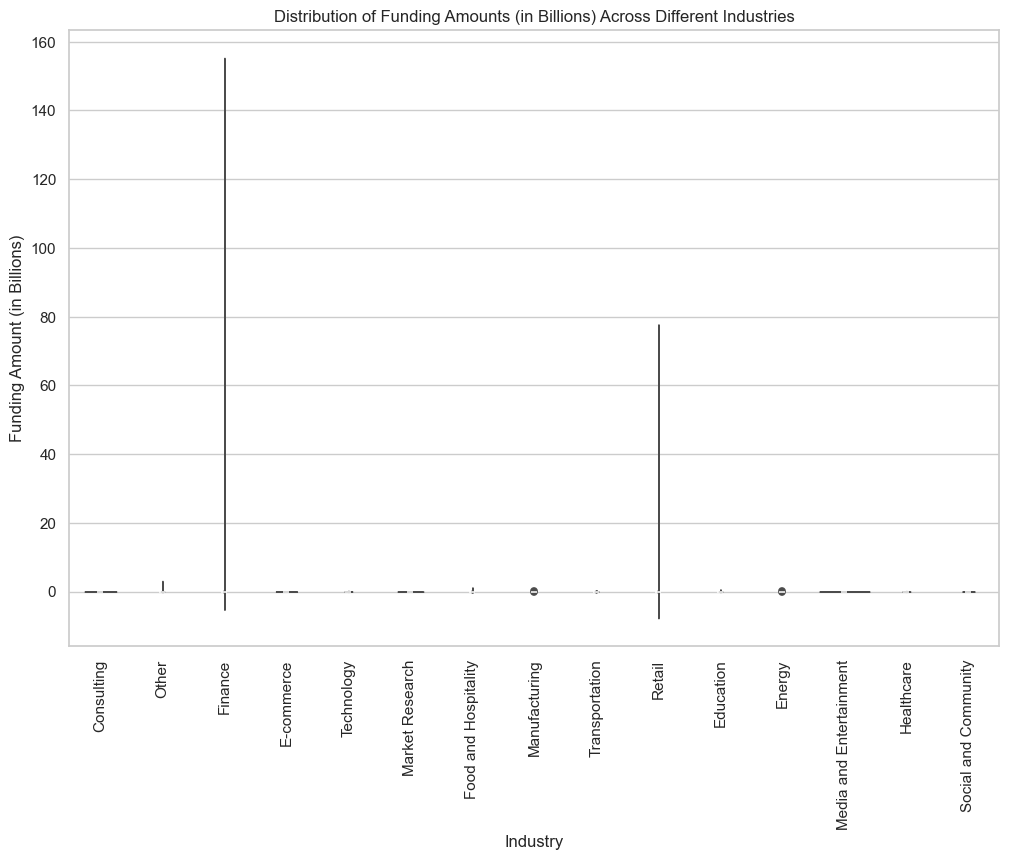

In [819]:
# Convert funding amounts to billions
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a violin plot to visualize the distribution of funding amounts (in billions) across different industries
plt.figure(figsize=(12, 8))
sns.violinplot(x='clean_industry', y='amount_in_billions', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Funding Amounts (in Billions) Across Different Industries')
plt.xlabel('Industry')
plt.ylabel('Funding Amount (in Billions)')
plt.show()

Question 2:  Are certain industries more consistent in funding amounts, indicating stability or predictability?

#### Using a line plot

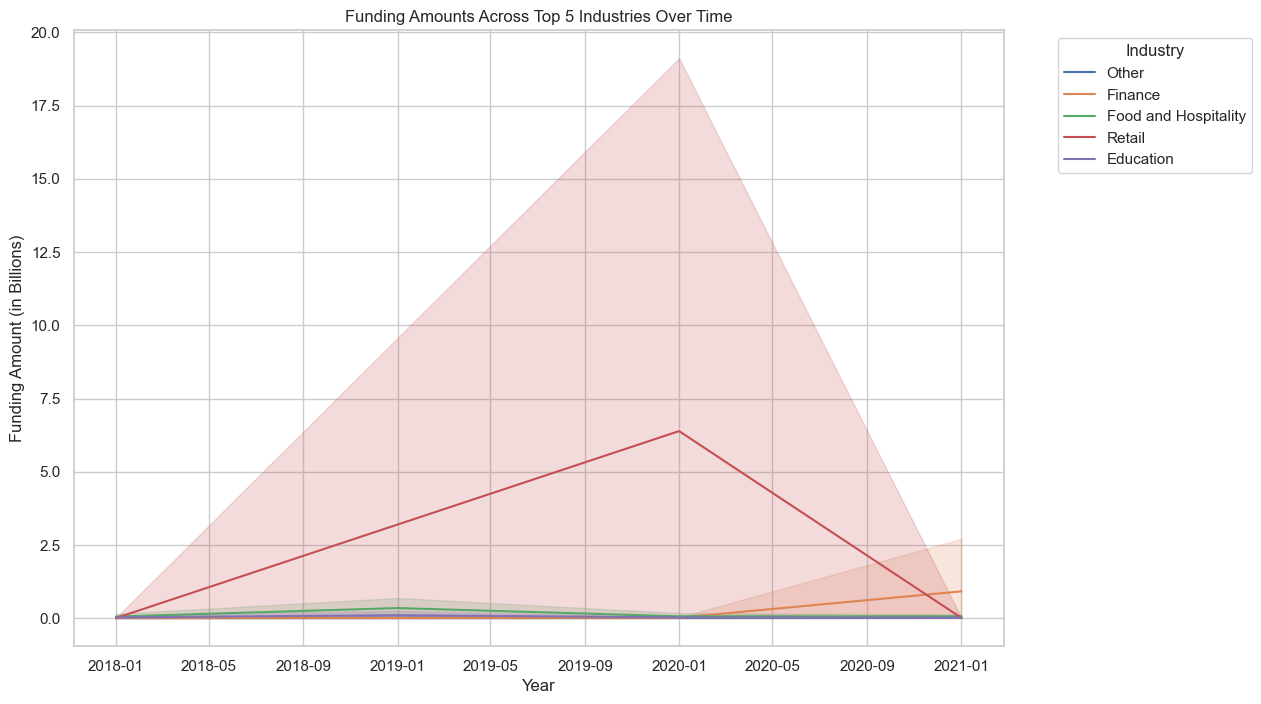

In [820]:
# Calculate the total funding amount for each clean industry
industry_funding = df.groupby('clean_industry')['amount'].sum()

# Sort the industries based on their total funding amounts in descending order and get the top 5
top_5_industries = industry_funding.nlargest(5).index

# Filter the DataFrame to include only data related to the top 5 industries
df_top_5 = df[df['clean_industry'].isin(top_5_industries)]

# Convert funding amounts to billions
df_top_5['amount_in_billions'] = df_top_5['amount'] / 1e9  # Divide by 1 billion

# Create a line plot to visualize the funding amounts for each of the top 5 industries over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='data_year', y='amount_in_billions', hue='clean_industry', data=df_top_5)
plt.title('Funding Amounts Across Top 5 Industries Over Time')
plt.xlabel('Year')
plt.ylabel('Funding Amount (in Billions)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

To be re done

Question 3. Can we identify specific industries that tend to attract higher funding amounts?

#### Using a barplot

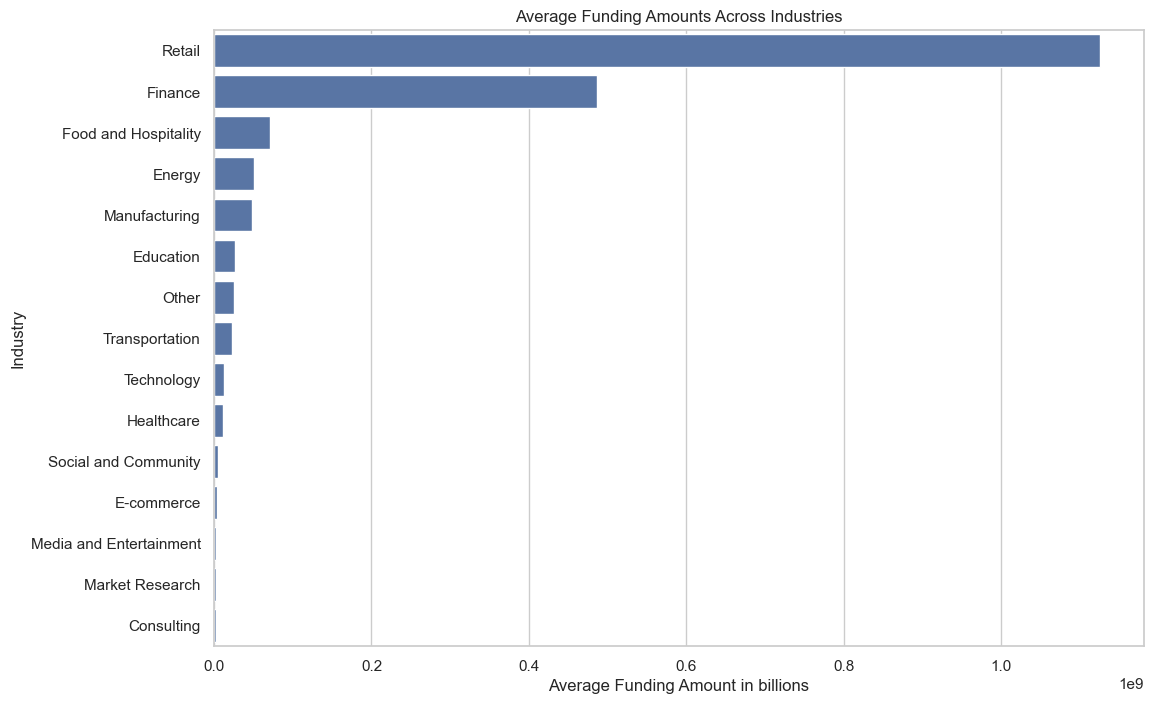

In [821]:
# Calculate the average funding amount for each industry
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion
industry_avg_funding = df.groupby('clean_industry')['amount'].mean().reset_index()

# Sort the industries based on their average funding amount in descending order
industry_avg_funding_sorted = industry_avg_funding.sort_values(by='amount', ascending=False)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot to visualize the average funding amounts for each industry
plt.figure(figsize=(12, 8))
sns.barplot(x='amount', y='clean_industry', data=industry_avg_funding_sorted)
plt.title('Average Funding Amounts Across Industries')
plt.xlabel('Average Funding Amount in billions')
plt.ylabel('Industry')
plt.show()

From the above visual, Retail industry had the highest funding than the rest

#### Question 4. Are there outliers in the funding amounts within certain industries?

#### Using a boxplot

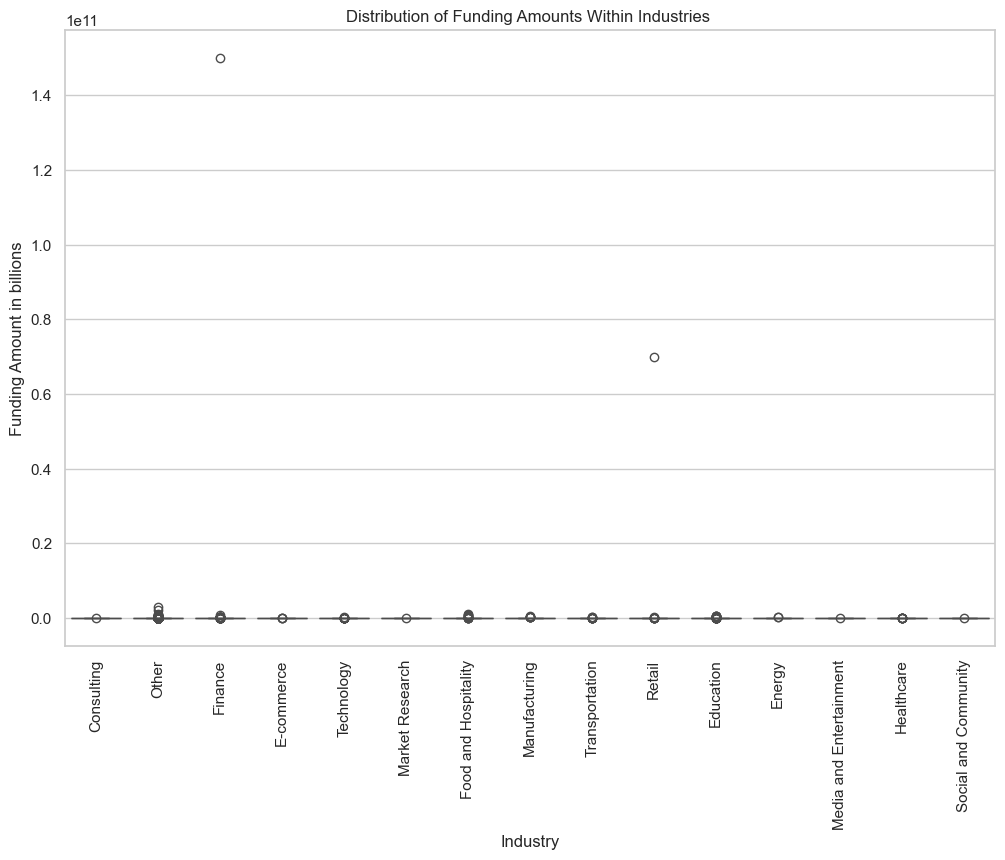

In [822]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Convert funding amounts to billions
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion

# Create a box plot to visualize the distribution of funding amounts within each industry
plt.figure(figsize=(12, 8))
sns.boxplot(x='clean_industry', y='amount', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Funding Amounts Within Industries ')
plt.xlabel('Industry')
plt.ylabel('Funding Amount in billions')
plt.show()

There are outliers in the Finanace and retail industries receiving unusually high funding than the rest

#### Question 5. Does the location influence the funding in certain industries

#### Using boxplot for states

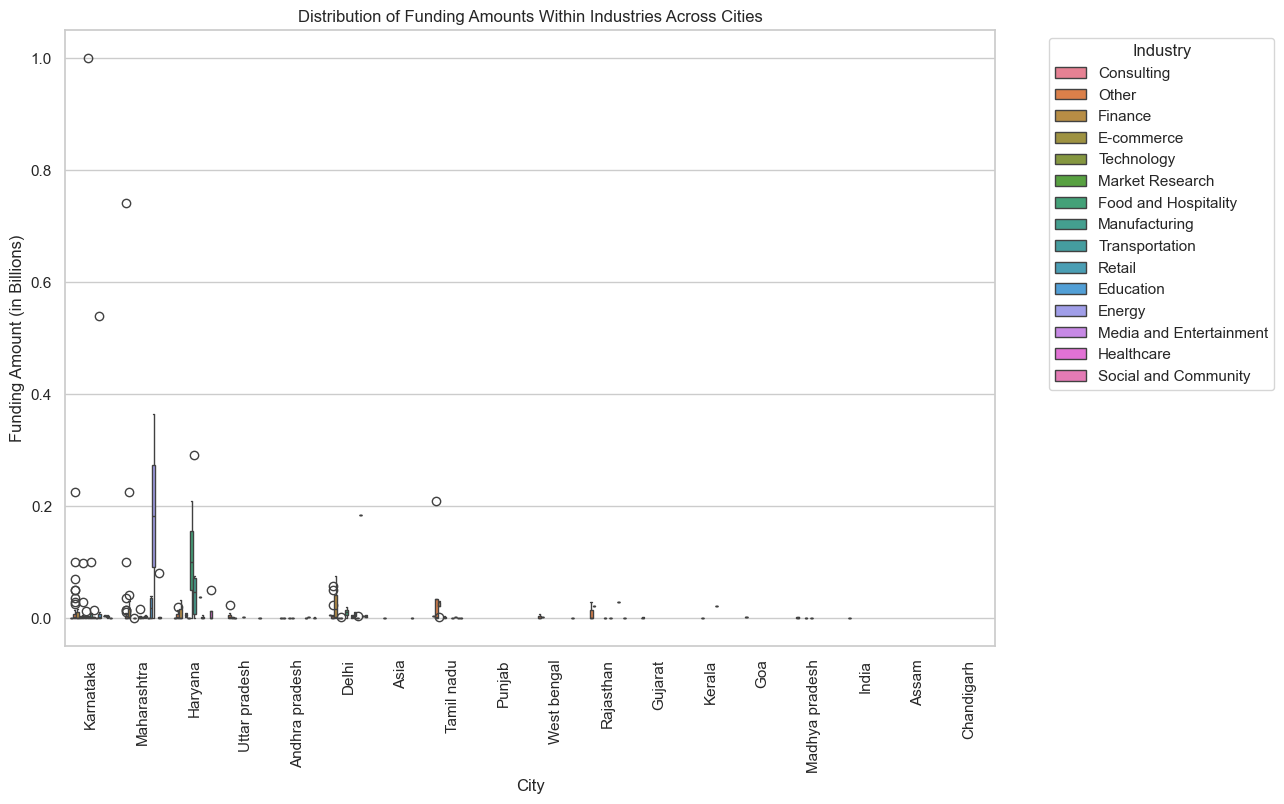

In [823]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of funding amounts within each industry across cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='amount_in_billions', hue='clean_industry', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Funding Amounts Within Industries Across Cities')
plt.xlabel('City')
plt.ylabel('Funding Amount (in Billions)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Using bar plot for cities

In [824]:
# Convert funding amounts to billions
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion
# Group the data by city and sum up the funding amounts
city_funding = df.groupby('city')['amount'].sum()

# Sort the cities based on their total funding amounts in descending order
city_funding_sorted = city_funding.sort_values(ascending=False)

# Display the cities with the highest funding
print(city_funding_sorted.head())

city
Mumbai        2.306864e+11
Bangalore     2.384487e+10
Gurugram      5.548232e+09
New delhi     3.416521e+09
California    3.078300e+09
Name: amount, dtype: float64


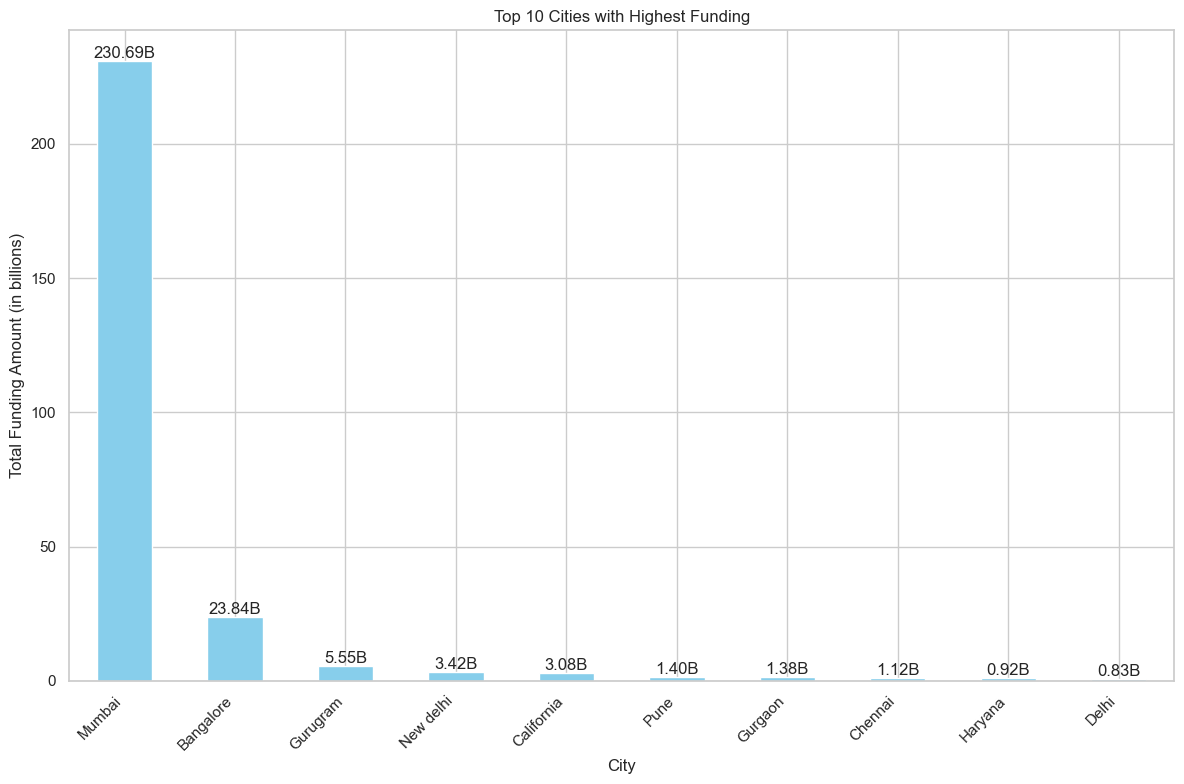

In [825]:
#Convert the funding amounts to billions
city_funding_billion = city_funding_sorted.head(10) / 1_000_000_000  # Convert to billions

# Plot the cities with the highest funding
plt.figure(figsize=(12, 8))
city_funding_billion.plot(kind='bar', color='skyblue')

# Add data labels to the bars
for i, amount in enumerate(city_funding_billion):
    plt.text(i, amount, f'{amount:.2f}B', ha='center', va='bottom')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Funding Amount (in billions)')
plt.title('Top 10 Cities with Highest Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()